<a href="https://colab.research.google.com/github/ahmedmustafa2003/Seat-Detection-Model-YOLO/blob/main/SEAT_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install YOLOv8 (Ultralytics)
!pip install ultralytics

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ultralytics import YOLO

# --- DEFINE THE CORRECT PATH ---
# Your data.yaml is located in a folder named SEAT-DETECTION directly under MyDrive.
DATA_CONFIG = '/content/drive/MyDrive/SEAT-DETECTION/data.yaml'
# -------------------------------

# 1. Load the pre-trained model (YOLOv8 Nano is the fastest)
model = YOLO('yolov8n.pt')

print(f"\nStarting training for SwiftRoute Crowd Estimation...")

# 2. Train the model
results = model.train(
    data=DATA_CONFIG,          # The configuration file defining the dataset
    epochs=50,                 #
    batch=16,
    name='swiftroute_crowd_model' # Results saved in runs/detect/swiftroute_crowd_model
)

# 3. Check Accuracy (Validation)
print("\nValidation Results:")
metrics = model.val()
print(f"Mean Average Precision (mAP50): {metrics.box.map50}")


Starting training for SwiftRoute Crowd Estimation...
Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/SEAT-DETECTION/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=swiftroute_crowd_model3, nbs=64, nms=False, opset=None, optimize=

In [ ]:
from ultralytics import YOLO

# 1. Define the path to your trained model file.
BEST_MODEL_PATH = '/content/runs/detect/swiftroute_crowd_model3/weights/best.pt'

# 2. Define the path to your test images. (FIXED: Added '/images')
TEST_IMAGE_FOLDER = '/content/drive/MyDrive/SEAT-DETECTION/test/images'

# 3. Load the best trained model (the 'brain')
model = YOLO(BEST_MODEL_PATH)

print(f"Model loaded successfully, ready for testing on images in: {TEST_IMAGE_FOLDER}")

Model loaded successfully, ready for testing on images in: /content/drive/MyDrive/SEAT-DETECTION/test/images


In [ ]:
print("\nStarting prediction on test images...")

# Run prediction
results = model.predict(
    source=TEST_IMAGE_FOLDER,
    conf=0.50,
    save=True,
    save_txt=True
)

print("\nPrediction complete!")

# -----------------------------
# COUNT OCCUPIED AND EMPTY SEATS
# -----------------------------
total_occupied = 0
total_empty = 0

for result in results:
    boxes = result.boxes  # YOLO detected boxes
    classes = boxes.cls.tolist()  # class IDs

    for c in classes:
        if int(c) == 1:      # occupied
            total_occupied += 1
        elif int(c) == 0:    # empty
            total_empty += 1

total_seats = total_occupied + total_empty

print("\n---------- SUMMARY ----------")
print(f"Total Seats Detected: {total_seats}")
print(f"Occupied Seats: {total_occupied}")
print(f"Empty Seats: {total_empty}")
print("--------------------------------\n")

print("Check your output images at:")
print("/content/runs/detect/predict/")



Starting prediction on test images...

image 1/207 /content/drive/MyDrive/SEAT-DETECTION/test/images/20240129071541246_9c47c313fd1847c1932933172067d406_AA0986735_jpg.rf.13398042eabb74f92f86727427334402.jpg: 384x640 10 Occupieds, 9 Unoccupieds, 41.4ms
image 2/207 /content/drive/MyDrive/SEAT-DETECTION/test/images/20240130131142751_9c47c313fd1847c1932933172067d406_AA0986735_jpg.rf.e7455eb1c80cdf34f45e24a6a1e4700b.jpg: 384x640 2 Occupieds, 31 Unoccupieds, 6.6ms
image 3/207 /content/drive/MyDrive/SEAT-DETECTION/test/images/20240130131150559_9c47c313fd1847c1932933172067d406_AA0986735_jpg.rf.c3202b286b0f93c5ed9f7ff55c8c868e.jpg: 384x640 2 Occupieds, 31 Unoccupieds, 11.3ms
image 4/207 /content/drive/MyDrive/SEAT-DETECTION/test/images/20240130131205924_9c47c313fd1847c1932933172067d406_AA0986735_jpg.rf.041a42aa9fddbd8087efa520b840dbb1.jpg: 384x640 2 Occupieds, 31 Unoccupieds, 6.7ms
image 5/207 /content/drive/MyDrive/SEAT-DETECTION/test/images/20240130131206460_9c47c313fd1847c1932933172067d406_A

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os


Image path: /content/runs/detect/predict/20240130131142751_9c47c313fd1847c1932933172067d406_AA0986735_jpg.rf.e7455eb1c80cdf34f45e24a6a1e4700b.jpg

---------- SEAT ANALYSIS ----------
Total Seats Detected: 33
Occupied Seats: 2
Empty Seats: 31
------------------------------------



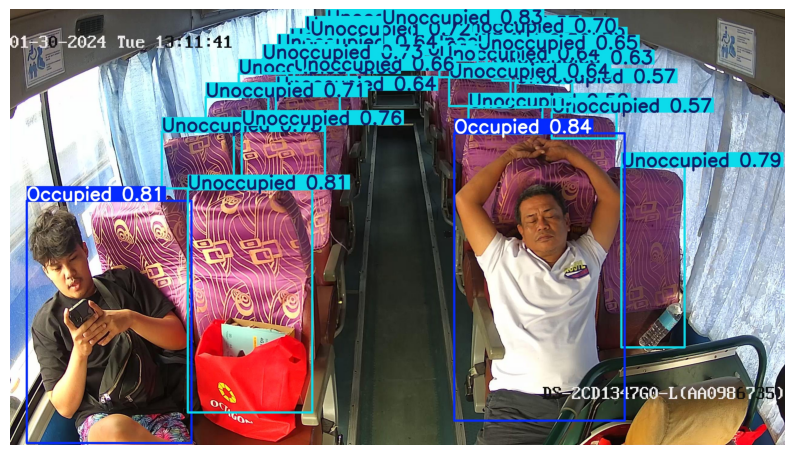

In [ ]:


# Your label file (found earlier)
label_path = "/content/runs/detect/predict/labels/20240130131142751_9c47c313fd1847c1932933172067d406_AA0986735_jpg.rf.e7455eb1c80cdf34f45e24a6a1e4700b.txt"

# Convert label path → image path
img_filename = os.path.basename(label_path).replace(".txt", ".jpg")
img_path = "/content/runs/detect/predict/" + img_filename

print("Image path:", img_path)

# ---------------------------------------
# Load Image
# ---------------------------------------
image = cv2.imread(img_path)

if image is None:
    print("ERROR: Image not found at:", img_path)
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # -------- Analyze seat counts --------
    occupied = 0
    empty = 0

    with open(label_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            class_id = int(line.split()[0])
            if class_id == 0:
                occupied += 1
            elif class_id == 1:
                empty += 1

    print("\n---------- SEAT ANALYSIS ----------")
    print(f"Total Seats Detected: {occupied + empty}")
    print(f"Occupied Seats: {occupied}")
    print(f"Empty Seats: {empty}")
    print("------------------------------------\n")

    # Show image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()
